In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [117]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [67]:
df_train = pd.read_csv("train.csv", delimiter="|")
df_train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [113]:
X_test = pd.read_csv("test.csv", delimiter="|")
X_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [114]:
y_test = pd.read_csv("DMC-2019-realclass.csv")
y_test.head(2)

,fraud
0,0
1,0


Check for datatype information and number of rows and columns

<h3>Data Cleaning

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
trustLevel                   1879 non-null int64
totalScanTimeInSeconds       1879 non-null int64
grandTotal                   1879 non-null float64
lineItemVoids                1879 non-null int64
scansWithoutRegistration     1879 non-null int64
quantityModifications        1879 non-null int64
scannedLineItemsPerSecond    1879 non-null float64
valuePerSecond               1879 non-null float64
lineItemVoidsPerPosition     1879 non-null float64
fraud                        1879 non-null int64
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [71]:
df_train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


<AxesSubplot:>

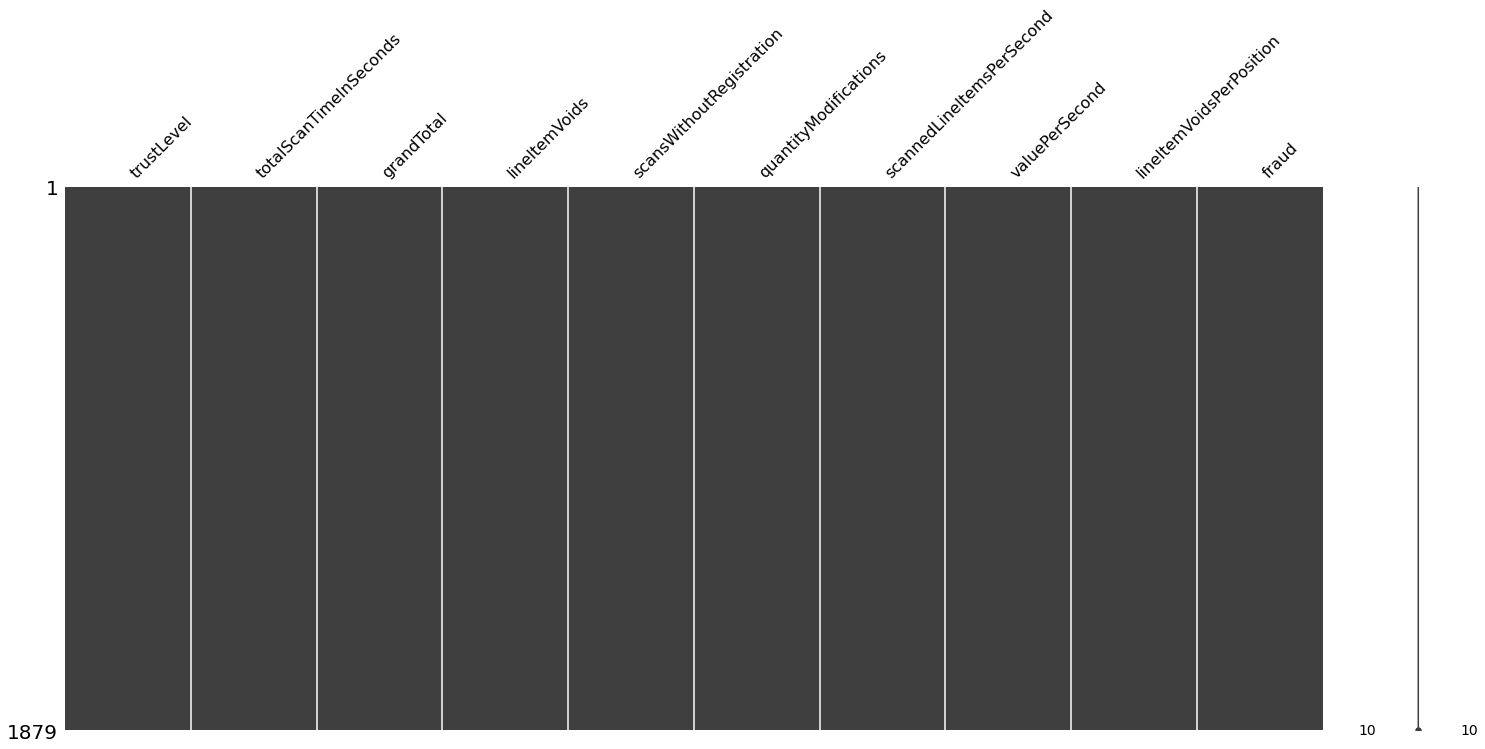

In [72]:
#check for missing values
df_train.isnull().sum().sort_values(ascending=False)
msno.matrix(df_train.sample(df_train.shape[0]))

## EDA

In [73]:
#check for number duplicate of data
x = df_train.duplicated().sum()
print("The number of duplicated values is : {}".format(x))

The number of duplicated values is : 0


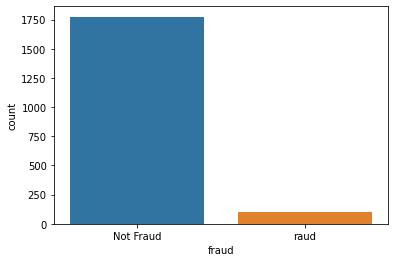

No Frauds 94.47 % of the dataset
Frauds 5.53 % of the dataset


In [74]:
#check number of fraud and not fraud
# visualize the target variable
g = sns.countplot(df_train['fraud'])
g.set_xticklabels(['Not Fraud','raud'])
plt.show()
print('No Frauds', round(df_train['fraud'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Frauds', round(df_train['fraud'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

<AxesSubplot:xlabel='trustLevel', ylabel='count'>

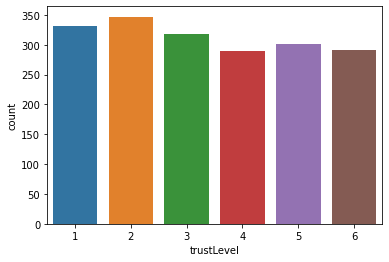

In [75]:
sns.countplot(df_train['trustLevel'])

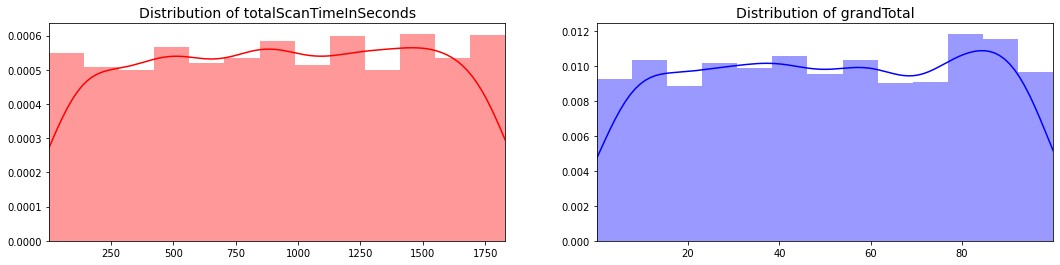

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df_train['totalScanTimeInSeconds'].values
time_val = df_train['grandTotal'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of totalScanTimeInSeconds', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of grandTotal', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [313]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_train['scale_totalScanTimeInSeconds'] = rob_scaler.fit_transform(df_train['totalScanTimeInSeconds'].values.reshape(-1,1))
df_train['scale_grandTotal'] = rob_scaler.fit_transform(df_train['grandTotal'].values.reshape(-1,1))

df_train.drop(['totalScanTimeInSeconds','grandTotal'], axis=1, inplace=True)

In [314]:
scale_totalScanTimeInSeconds = df_train['scale_totalScanTimeInSeconds']
scale_grandTotal = df_train['scale_grandTotal']

df_train.drop(['scale_totalScanTimeInSeconds', 'scale_grandTotal'], axis=1, inplace=True)
df_train.insert(0, 'scale_grandTotal',scale_grandTotal)
df_train.insert(1, 'scale_totalScanTimeInSeconds', scale_totalScanTimeInSeconds )

# Amount and Time are Scaled!

df_train.head()

,scale_grandTotal,scale_totalScanTimeInSeconds,trustLevel,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,0.068005,0.132249,5,7,0,3,0.027514,0.051898,0.241379,0
1,-0.464731,-0.893225,3,5,2,4,0.129630,0.253333,0.357143,0
2,0.213367,0.633062,3,3,10,5,0.008575,0.041003,0.230769,0
3,0.800857,0.931165,6,8,4,4,0.016192,0.051541,0.275862,0
4,0.590803,-0.544173,5,3,7,2,0.062791,0.189605,0.111111,0


<b> Oversampling

In [53]:
from sklearn.utils import resample

df_majority = df_train[df_train.fraud==0]
df_minority = df_train[df_train.fraud==1]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_train[df_train.fraud==0].shape[0],    # to match majority class
                                 random_state=123) # reproducible results
new_df = pd.concat([df_majority, df_minority_upsampled])
new_df

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1371,1,1476,64.39,9,8,4,0.012195,0.043625,0.500000,1
1341,1,1314,32.61,3,10,5,0.017504,0.024817,0.130435,1
1600,1,1406,77.48,7,1,5,0.016358,0.055107,0.304348,1
1811,2,1461,39.82,6,9,1,0.017112,0.027255,0.240000,1


<b> Undersampling

In [76]:
df = df_train.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['fraud'] == 1]
non_fraud_df = df.loc[df['fraud'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
136,2,282,70.79,4,8,4,0.024823,0.251028,0.571429,0
890,1,1009,31.03,3,7,3,0.028741,0.030753,0.103448,1
97,2,1305,87.65,7,8,4,0.021456,0.067165,0.250000,1
1789,1,1681,60.33,10,0,0,0.013682,0.035889,0.434783,1
291,2,1813,22.14,8,1,0,0.005516,0.012212,0.800000,0


In [78]:
new_df.shape

(208, 10)

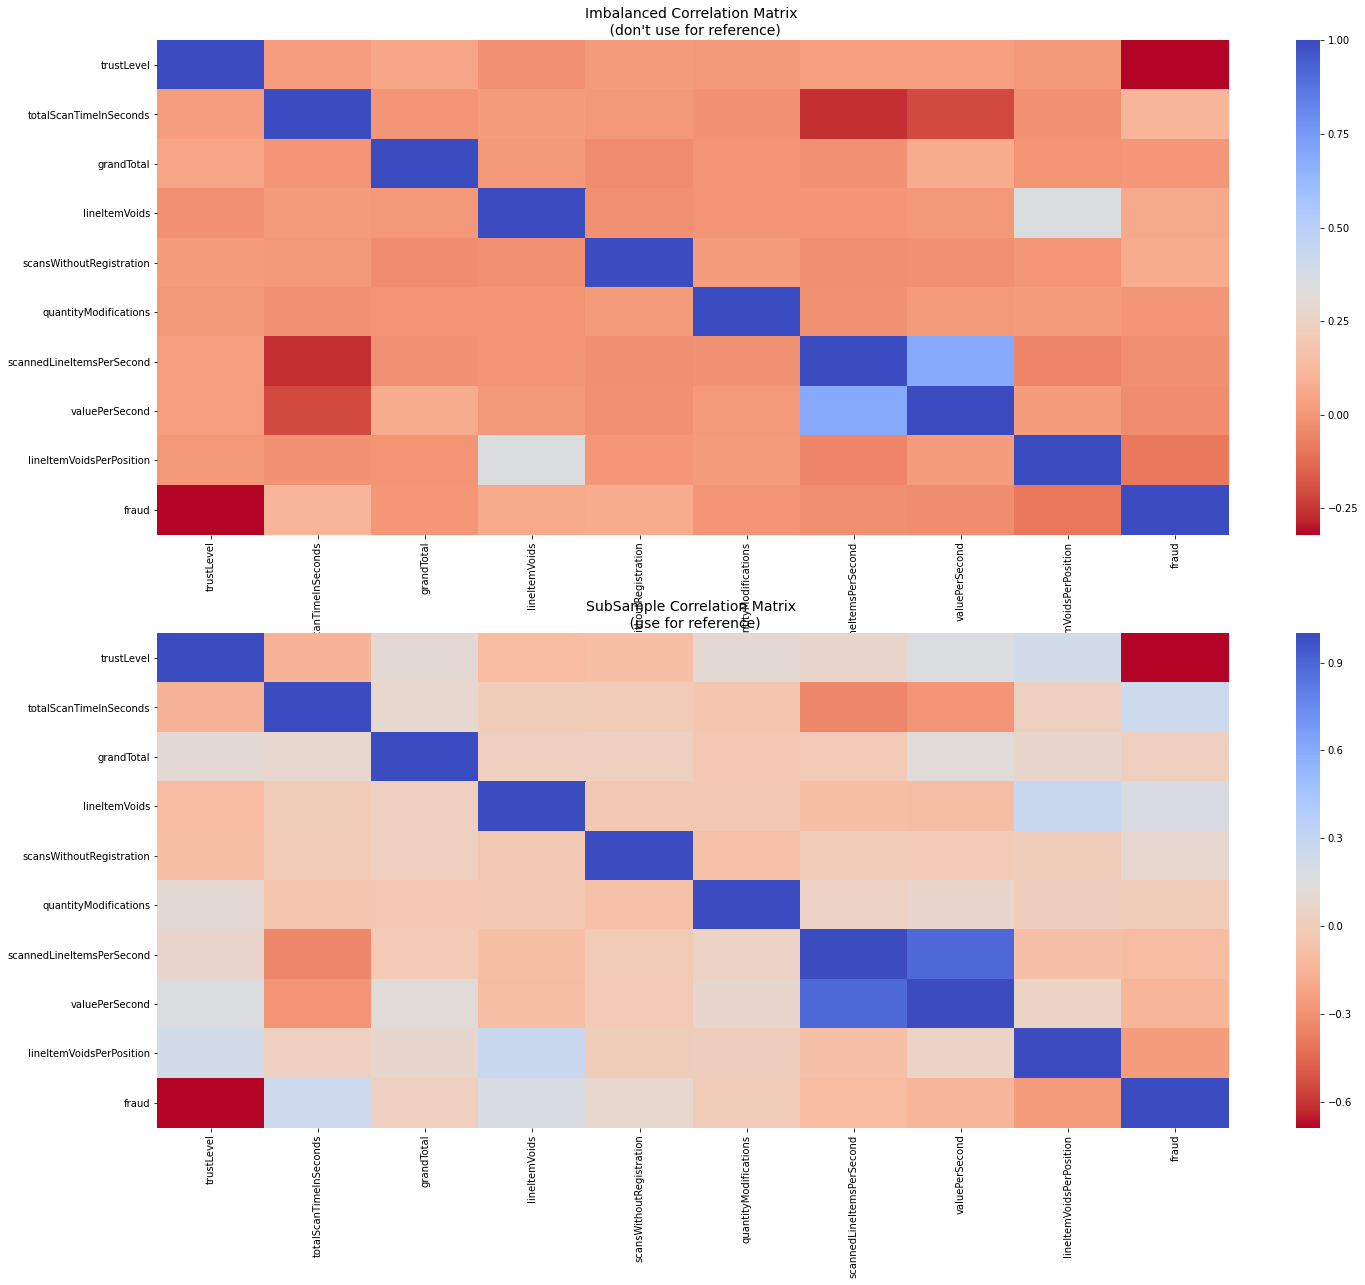

In [79]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df_train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

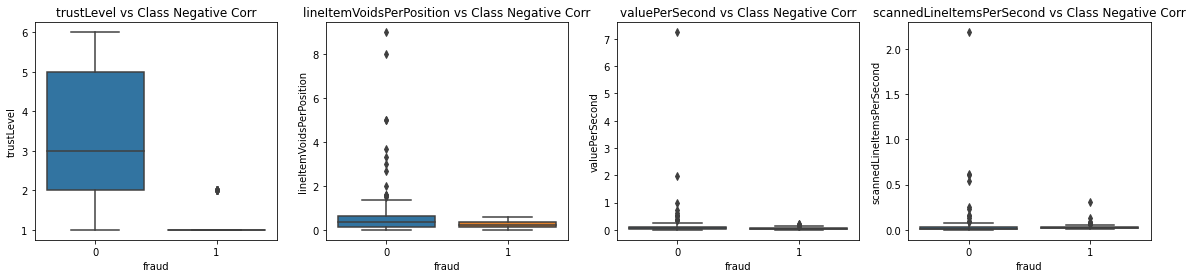

In [83]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="fraud", y="trustLevel", data=new_df, ax=axes[0])
axes[0].set_title('trustLevel vs Class Negative Corr')

sns.boxplot(x="fraud", y="lineItemVoidsPerPosition", data=new_df, ax=axes[1])
axes[1].set_title('lineItemVoidsPerPosition vs Class Negative Corr')


sns.boxplot(x="fraud", y="valuePerSecond", data=new_df,  ax=axes[2])
axes[2].set_title('valuePerSecond vs Class Negative Corr')


sns.boxplot(x="fraud", y="scannedLineItemsPerSecond", data=new_df,  ax=axes[3])
axes[3].set_title('scannedLineItemsPerSecond vs Class Negative Corr')

plt.show()

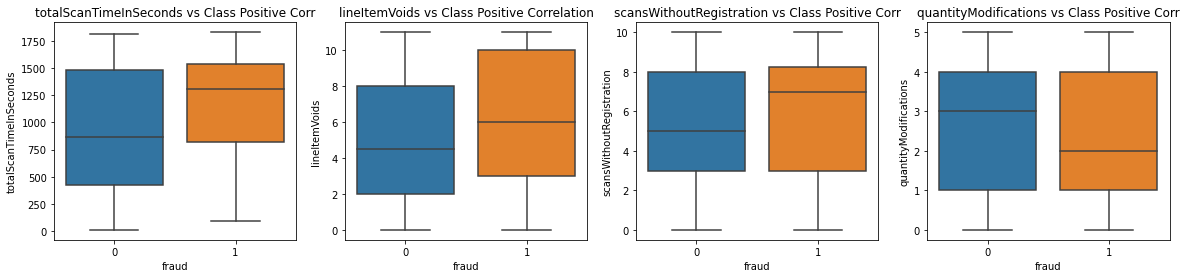

In [84]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="fraud", y="totalScanTimeInSeconds", data=new_df, ax=axes[0])
axes[0].set_title('totalScanTimeInSeconds vs Class Positive Corr')

sns.boxplot(x="fraud", y="lineItemVoids", data=new_df,  ax=axes[1])
axes[1].set_title('lineItemVoids vs Class Positive Correlation')


sns.boxplot(x="fraud", y="scansWithoutRegistration", data=new_df, ax=axes[2])
axes[2].set_title('scansWithoutRegistration vs Class Positive Corr')


sns.boxplot(x="fraud", y="quantityModifications", data=new_df, ax=axes[3])
axes[3].set_title('quantityModifications vs Class Positive Corr')

plt.show()

In [85]:
# # -----> trustLevel Removing Outliers (Highest Negative Correlated with Labels)
trustLevel_fraud = new_df['trustLevel'].loc[new_df['fraud'] == 1].values
q25, q75 = np.percentile(trustLevel_fraud, 25), np.percentile(trustLevel_fraud, 75)
trustLevel_iqr = q75 - q25
trustLevel_cut_off = trustLevel_iqr * 1.5
trustLevel_lower, trustLevel_upper = q25 - trustLevel_cut_off, q75 + trustLevel_cut_off
new_df = new_df.drop(new_df[(new_df['trustLevel'] > trustLevel_upper) | (new_df['trustLevel'] < trustLevel_lower)].index)


# # -----> scannedLineItemsPerSecond Removing Outliers (Highest Negative Correlated with Labels)
scannedLineItemsPerSecond_fraud = new_df['scannedLineItemsPerSecond'].loc[new_df['fraud'] == 1].values
q25, q75 = np.percentile(scannedLineItemsPerSecond_fraud, 25), np.percentile(scannedLineItemsPerSecond_fraud, 75)
scannedLineItemsPerSecond_iqr = q75 - q25
scannedLineItemsPerSecond_cut_off = scannedLineItemsPerSecond_iqr * 1.5
scannedLineItemsPerSecond_lower, scannedLineItemsPerSecond_upper = q25 - scannedLineItemsPerSecond_cut_off, q75 + scannedLineItemsPerSecond_cut_off
new_df = new_df.drop(new_df[(new_df['scannedLineItemsPerSecond'] > scannedLineItemsPerSecond_upper) | (new_df['scannedLineItemsPerSecond'] < scannedLineItemsPerSecond_lower)].index)

In [104]:
new_df

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
890,1,1009,31.03,3,7,3,0.028741,0.030753,0.103448,1
1789,1,1681,60.33,10,0,0,0.013682,0.035889,0.434783,1
1411,1,913,95.01,8,0,0,0.030668,0.104064,0.285714,1
278,1,618,98.64,11,8,2,0.042071,0.159612,0.423077,1
390,1,1691,90.31,6,5,1,0.012419,0.053406,0.285714,1
...,...,...,...,...,...,...,...,...,...,...
991,1,422,55.55,5,8,4,0.049763,0.131635,0.238095,0
1697,1,673,77.29,9,8,1,0.037147,0.114844,0.360000,1
1012,1,739,32.23,5,1,3,0.028417,0.043613,0.238095,0
1341,1,1314,32.61,3,10,5,0.017504,0.024817,0.130435,1


In [ ]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="fraud", y="trustLevel", data=new_df,ax=ax1, palette=colors)
ax1.set_title("trustLevel Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
# sns.boxplot(x="fraud", y="scannedLineItemsPerSecond", data=new_df, ax=ax2, palette=colors)
# ax2.set_title("scannedLineItemsPerSecond Feature \n Reduction of outliers", fontsize=14)
# ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
#             arrowprops=dict(facecolor='black'),
#             fontsize=14)


# sns.boxplot(x="fraud", y="scannedLineItemsPerSecond", data=new_df, ax=ax1, palette=colors)
# ax1.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
# ax1.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
#             arrowprops=dict(facecolor='black'),
#             fontsize=14)



In [107]:
# Undersampling before cross validating (prone to overfit)
X_train = new_df.drop('fraud', axis=1)
y_train = new_df['fraud']

In [108]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [111]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [112]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 86.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 87.0 % accuracy score
Classifiers:  SVC Has a training score of 87.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score


In [121]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [122]:
from sklearn.metrics import confusion_matrix


# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

In [123]:
from sklearn.metrics import classification_report

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.96      0.03      0.07    474394
           1       0.05      0.97      0.09     23727

    accuracy                           0.08    498121
   macro avg       0.51      0.50      0.08    498121
weighted avg       0.92      0.08      0.07    498121

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.21      0.35    474394
           1       0.06      1.00      0.11     23727

    accuracy                           0.25    498121
   macro avg       0.53      0.61      0.23    498121
weighted avg       0.96      0.25      0.34    498121

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54    474394
           1       0.07      0.97      0.13     23727

    accuracy                           0.40    498121
   macro avg       0.53      0.67      0.34    498121
we

In [ ]:
from sklearn.metrics import classification_report


# print('Logistic Regression:')
# print(classification_report(y_test, y_pred_log_reg))

# print('KNears Neighbors:')
# print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

<AxesSubplot:title={'center':'Correlation of Numeric Features with Fraud'}>

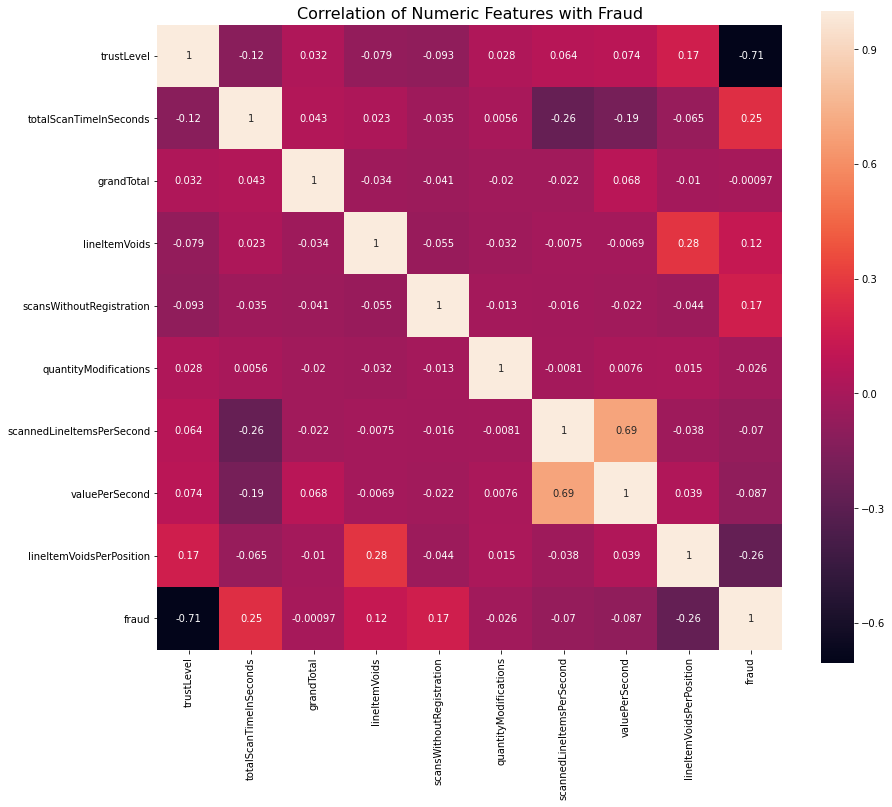

In [10]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Fraud',y=1,size=16)
sns.heatmap(df_train.corr(),square = True, annot = True)

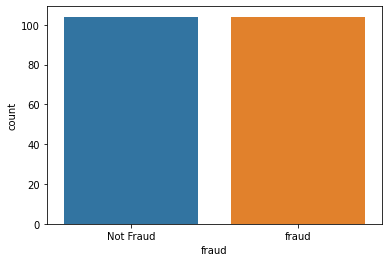

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


In [32]:
g = sns.countplot(df_train['fraud'])
g.set_xticklabels(['Not Fraud','fraud'])
plt.show()
print('No Frauds', round(df_train['fraud'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Frauds', round(df_train['fraud'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

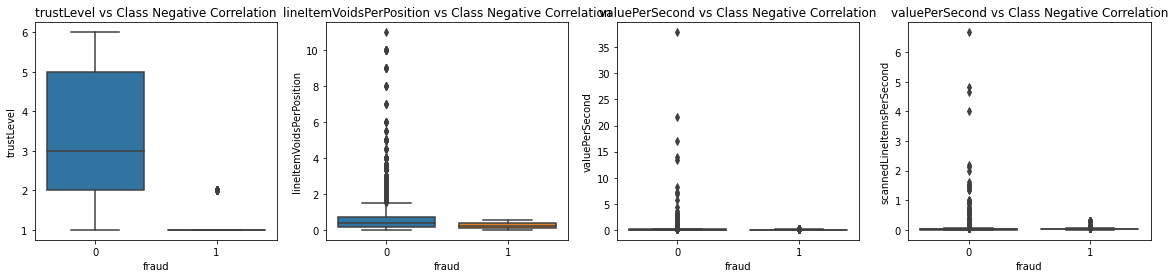

In [12]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="fraud", y="trustLevel", data=df_train, ax=axes[0])
axes[0].set_title('trustLevel vs Class Negative Correlation')

sns.boxplot(x="fraud", y="lineItemVoidsPerPosition", data=df_train, ax=axes[1])
axes[1].set_title('lineItemVoidsPerPosition vs Class Negative Correlation')


sns.boxplot(x="fraud", y="valuePerSecond", data=df_train, ax=axes[2])
axes[2].set_title('valuePerSecond vs Class Negative Correlation')


sns.boxplot(x="fraud", y="scannedLineItemsPerSecond", data=df_train, ax=axes[3])
axes[3].set_title('valuePerSecond vs Class Negative Correlation')
plt.show()

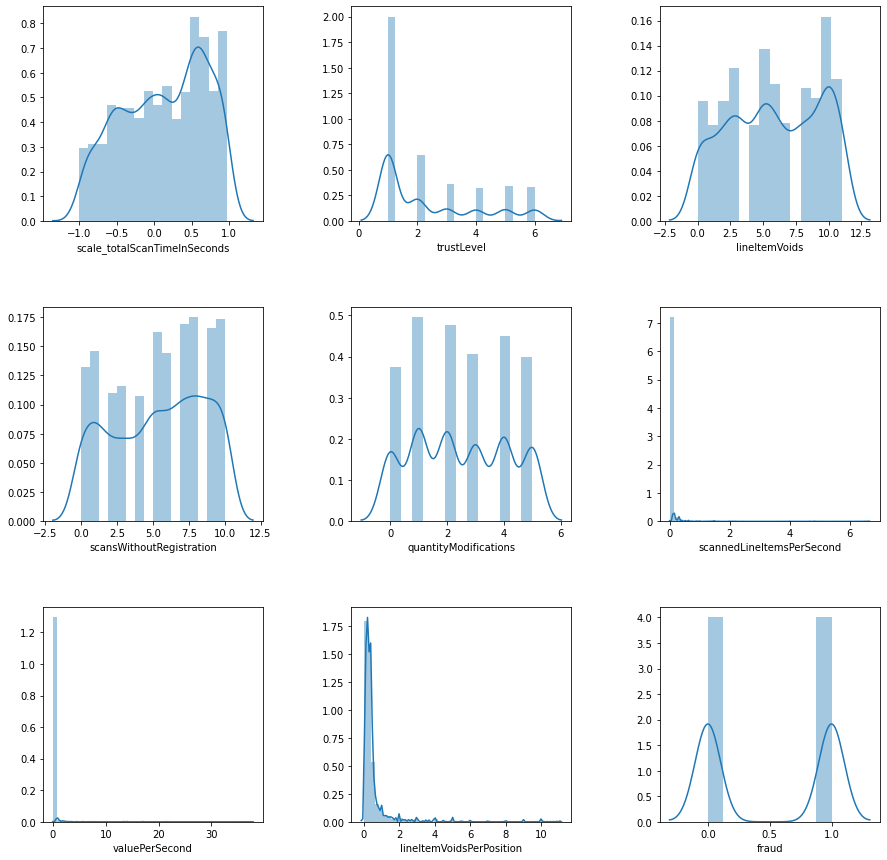

In [320]:
#Univariate Analysis
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(df_train.columns)):
    ax = fig.add_subplot(3, 3, i)
#     ax.hist(dtrain[col_numeric[i]])
    sns.distplot(df_train[df_train.columns[i]])
    plt.xlabel(df_train.columns[i])

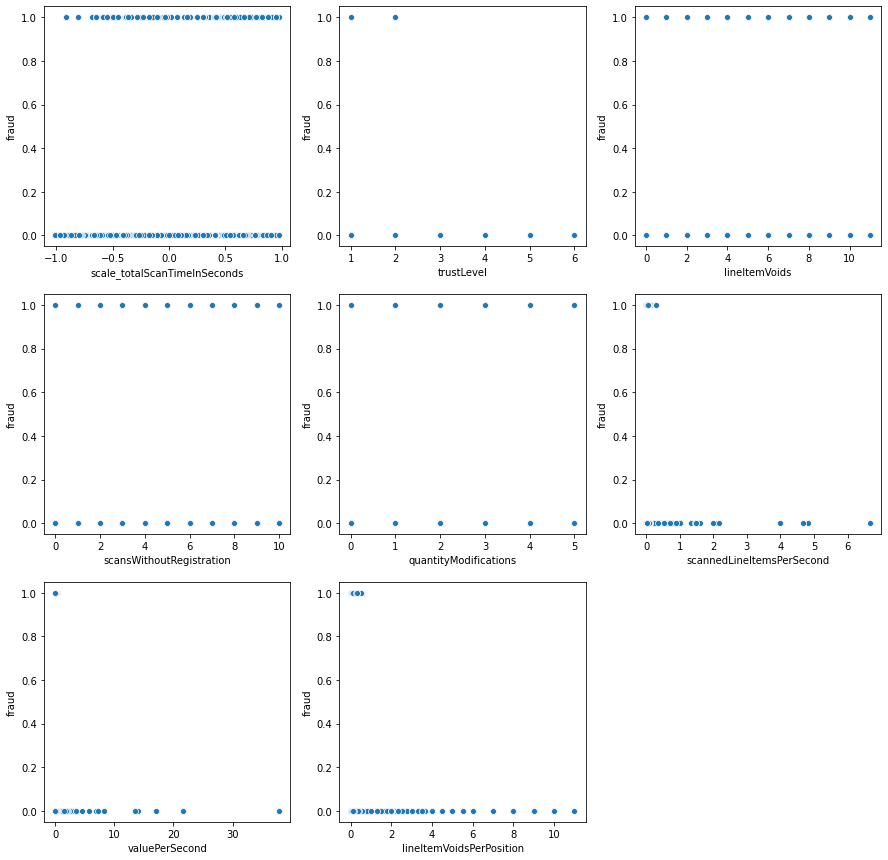

In [321]:
#Bivariate Analysis

fig = plt.figure(figsize=(15, 15))
# fig.subplots_adjust()
for i in range(1, len(df_train.columns[:-1])):
    axs = fig.add_subplot(3, 3, i)
    sns.scatterplot(x = df_train.columns[i], y = df_train.columns[-1], data = df_train)
    plt.xlabel(df_train.columns[i])
    plt.ylabel(df_train.columns[-1])

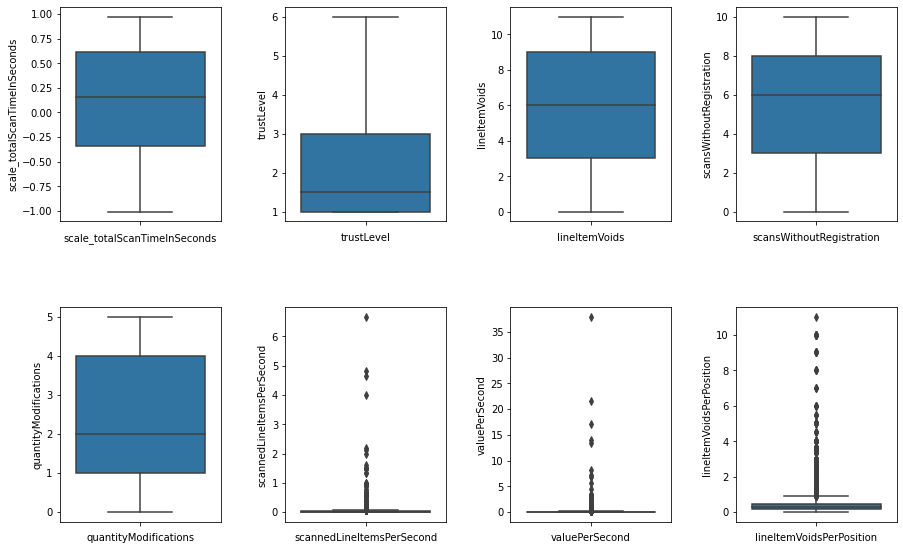

In [322]:
#Univariate Analysis
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(df_train.columns[:-1])):
    ax = fig.add_subplot(3, 4, i)
    sns.boxplot(x=df_train[df_train.columns[i]], orient="v")
    plt.xlabel(df_train.columns[i])

## Preprocessing

Handling With outlier

In [294]:
#Capping the outlier rows with Percentiles
upper_lim = df_train['scannedLineItemsPerSecond'].quantile(.95)
lower_lim = df_train['scannedLineItemsPerSecond'].quantile(.05)
df_train.loc[(df_train['scannedLineItemsPerSecond'] > upper_lim),'scannedLineItemsPerSecond'] = upper_lim
df_train.loc[(df_train['scannedLineItemsPerSecond'] < lower_lim),'scannedLineItemsPerSecond'] = lower_lim
upper_lim = df_train['valuePerSecond'].quantile(.95)
lower_lim = df_train['valuePerSecond'].quantile(.05)
df_train.loc[(df_train['valuePerSecond'] > upper_lim),'valuePerSecond'] = upper_lim
df_train.loc[(df_train['valuePerSecond'] < lower_lim),'valuePerSecond'] = lower_lim
upper_lim = df_train['lineItemVoidsPerPosition'].quantile(.95)
lower_lim = df_train['lineItemVoidsPerPosition'].quantile(.05)
df_train.loc[(df_train['lineItemVoidsPerPosition'] > upper_lim),'lineItemVoidsPerPosition'] = upper_lim
df_train.loc[(df_train['lineItemVoidsPerPosition'] < lower_lim),'lineItemVoidsPerPosition'] = lower_lim

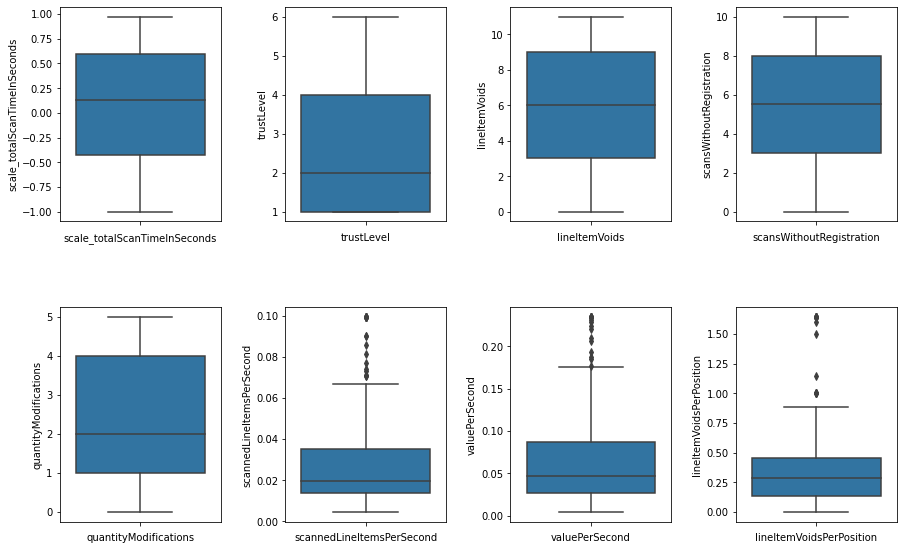

In [295]:
#Univariate Analysis
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(df_train.columns[:-1])):
    ax = fig.add_subplot(3, 4, i)
    sns.boxplot(x=df_train[df_train.columns[i]], orient="v")
    plt.xlabel(df_train.columns[i])

[0.03026393 0.08499514 0.53370678 0.04803661 0.05074213 0.02940672
 0.10676673 0.03301836 0.0830636 ]


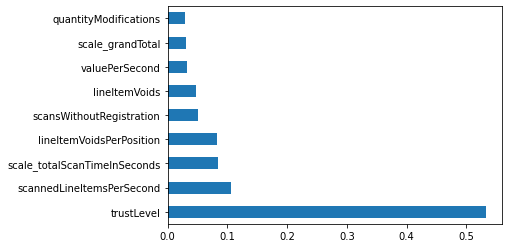

In [323]:
X_train = df_train.iloc[:,0:-1]  #independent columns
y_train = df_train.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [324]:
df_train.columns

Index(['scale_grandTotal', 'scale_totalScanTimeInSeconds', 'trustLevel',
       'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud'],
      dtype='object')

In [39]:
X_train = df_train[['trustLevel','grandTotal','totalScanTimeInSeconds','lineItemVoidsPerPosition']]
y_train = df_train['fraud']

In [40]:
X_test = X_test[['trustLevel','grandTotal','totalScanTimeInSeconds','lineItemVoidsPerPosition']]

## Scalling

# Handling imbalance Class:

### Menggunakan SMOTE

In [464]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [465]:
X_train_smote

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,scannedLineItemsPerSecond,lineItemVoidsPerPosition
0,5,1054,54.700000,7,0,0.027514,0.241379
1,3,108,27.360000,5,2,0.129630,0.357143
2,3,1516,62.160000,3,10,0.008575,0.230769
3,6,1791,92.310000,8,4,0.016192,0.275862
4,5,430,81.530000,3,7,0.062791,0.111111
...,...,...,...,...,...,...,...
3545,1,1397,60.546840,2,6,0.016453,0.120857
3546,1,589,47.399808,10,6,0.049137,0.358582
3547,1,1602,62.249094,5,9,0.015599,0.219924
3548,1,882,72.556081,8,9,0.027331,0.348563


In [466]:
from collections import Counter
print("Before: ", Counter(y_train))
print("Before: ", Counter(y_train_smote))

Before:  Counter({0: 1775, 1: 104})
Before:  Counter({0: 1775, 1: 1775})


=================================

In [25]:
from sklearn.utils import resample

df_majority = df_train[df_train.fraud==0]
df_minority = df_train[df_train.fraud==1]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_train[df_train.fraud==0].shape[0],    # to match majority class
                                 random_state=123) # reproducible results
df = pd.concat([df_majority, df_minority_upsampled])
print(len(df))

3550


In [224]:
X_train = df.iloc[:,0:-1]  #independent columns
y_train = df.iloc[:,-1] 

=======================================================

In [111]:
from imblearn.under_sampling import RandomUnderSampler
y = df_train["fraud"]
X = df_train.drop("fraud", axis=1)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X, y)
X_train

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,6,328,56.33,1,9,0,0.064024,0.171738,0.047619
1,2,250,33.95,11,10,3,0.056000,0.135800,0.785714
2,5,183,37.97,6,2,0,0.156472,0.207486,0.206897
3,3,1446,6.37,10,3,0,0.020747,0.005940,0.333333
4,5,1262,81.87,4,1,0,0.020602,0.064873,0.153846
...,...,...,...,...,...,...,...,...,...
203,2,1689,13.70,8,1,1,0.017762,0.008111,0.266667
204,1,1465,58.95,10,0,2,0.017065,0.040239,0.400000
205,1,801,73.63,6,1,4,0.034956,0.091923,0.214286
206,1,1400,59.43,3,6,2,0.016429,0.042450,0.130435


In [119]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler()

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 1775, 1: 104})
Resample dataset shape Counter({0: 1775, 1: 1775})


<b> Without Handling Imbalace Class

In [325]:
X_train = df_train.iloc[:,0:-1]  #independent columns
y_train = df_train.iloc[:,-1]
X_train.head()

,scale_grandTotal,scale_totalScanTimeInSeconds,trustLevel,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,0.068005,0.132249,5,7,0,3,0.027514,0.051898,0.241379
1,-0.464731,-0.893225,3,5,2,4,0.129630,0.253333,0.357143
2,0.213367,0.633062,3,3,10,5,0.008575,0.041003,0.230769
3,0.800857,0.931165,6,8,4,4,0.016192,0.051541,0.275862
4,0.590803,-0.544173,5,3,7,2,0.062791,0.189605,0.111111


<b> Scalling

In [41]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
norm.fit(X_train)
X_train = pd.DataFrame(norm.transform(X_train))
print(X_train.describe)

<bound method NDFrame.describe of              0         1         2         3
0     0.935189  0.132567  0.229898 -0.379855
1    -0.235121 -0.812391 -1.554996 -0.292611
2    -0.235121  0.390409  1.101590 -0.387851
3     1.520344  1.432490  1.620455 -0.353867
4     0.935189  1.059898 -0.947453 -0.478031
...        ...       ...       ...       ...
1874 -1.405431  0.869801 -1.153112 -0.299632
1875 -1.405431 -0.310187 -1.009716 -0.416837
1876  0.350034 -0.312261 -1.162546 -0.436162
1877 -0.820276  0.408382 -0.466324 -0.530367
1878  0.350034 -0.443601  0.392161 -0.482438

[1879 rows x 4 columns]>


## DST

In [42]:
from sklearn.tree import DecisionTreeClassifier as dt

mod = dt()
mod.fit(X_train, y_train)
predict = mod.predict(X_test)
from sklearn.metrics import *
print('Classification Report of DecisionTree')
print(classification_report(y_test, predict))

Classification Report of DecisionTree
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    474394
           1       0.00      0.00      0.00     23727

    accuracy                           0.95    498121
   macro avg       0.48      0.50      0.49    498121
weighted avg       0.91      0.95      0.93    498121



In [256]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_ros, y_ros)

svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ValueError: X.shape[1] = 4 should be equal to 7, the number of features at training time

In [101]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_ros, y_ros)

# predict
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.8568006629315128
Accuracy score: 0.9762768483962732
F1 score: 0.7442705966370188


SVM

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train.values.ravel())

SVC()

In [29]:
y_pred = svclassifier.predict(X_test)
accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[276044 198350]
 [  8875  14852]]
              precision    recall  f1-score   support

           0       0.97      0.58      0.73    474394
           1       0.07      0.63      0.13     23727

    accuracy                           0.58    498121
   macro avg       0.52      0.60      0.43    498121
weighted avg       0.93      0.58      0.70    498121



In [551]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.8234485195364178

In [552]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[405313  69081]
 [ 18863   4864]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90    474394
           1       0.07      0.20      0.10     23727

    accuracy                           0.82    498121
   macro avg       0.51      0.53      0.50    498121
weighted avg       0.91      0.82      0.86    498121



In [71]:
from sklearn.tree import DecisionTreeClassifier as dt

mod = dt()
mod.fit(X_train, y_train)
predict = mod.predict(X_test)

# scores = cross_val_score(mod, X_train, y_train, cv=5)
# print('Val score :',scores.mean())

print('Classification Report of DecisionTree')
print(classification_report(y_test, predict))

print('Train score :', mod.score(X_train, y_train))
print('Test score :',mod.score(X_test, y_test))

Classification Report of DecisionTree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    474394
           1       0.69      0.67      0.68     23727

    accuracy                           0.97    498121
   macro avg       0.84      0.83      0.83    498121
weighted avg       0.97      0.97      0.97    498121

Train score : 1.0
Test score : 0.9700755438939535


In [555]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X_train, y_train, cv=5)
print('Val score :',scores.mean())

from sklearn.metrics import *
print('Classification Report of gaussianNB')
print(classification_report(y_test, pred))

print('Train score :,', gnb.score(X_train, y_train))
print('Test score :',gnb.score(X_test, y_test))

Val score : 0.8909859154929578
Classification Report of gaussianNB
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    474394
           1       0.20      0.96      0.34     23727

    accuracy                           0.82    498121
   macro avg       0.60      0.89      0.62    498121
weighted avg       0.96      0.82      0.87    498121

Train score :, 0.8907042253521127
Test score : 0.818459771822509
